In [1]:
%pip install txtai flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
import txtai
import os
import json 

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Create embeddings for each web page
embeddings = txtai.Embeddings(path="sebastian-hofstaetter/distilbert-dot-tas_b-b256-msmarco", content=True)

def to_displayable_text(row):
    return f"{row['url']}\n{row['summary']}"

if 'final_urls' not in globals():
    try:
        with open('./data/sublist_llm_summaries_from_pipeline.json', 'r') as f:
            final_urls = json.load(f)
    except FileNotFoundError:
        print('No file found')

if final_urls is not None:
    embeddings.index([(row["url"], to_displayable_text(row)) for row in final_urls])

def search(query, max_results=1):
    # Search index
    results = embeddings.search(query, max_results)
    return results

def explain(query, limit=1):
    # Explain index
    results = embeddings.explain(query,limit=limit)
    return results

In [14]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/search', methods=['POST'])
def search_endpoint():
    """Search the embeddings index."""
    data = request.get_json()
    query = data.get('query', '')
    max_results = data.get('max_results', 5)
    results = search(query, max_results=max_results)
    return jsonify({'results': results})

@app.route('/explain', methods=['POST'])
def explain_endpoint():
    """Explain the embeddings index."""
    data = request.get_json()
    query = data.get('query', '')
    max_results = data.get('max_results', 1)
    results = explain(query, max_results)
    return jsonify({'results': results})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [09/Apr/2024 21:48:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:48:22] "GET /style.css HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:48:24] "POST /explain HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:48:50] "POST /search HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:49:03] "POST /explain HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:27] "GET /style.css HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:27] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [09/Apr/2024 21:51:29] "POST /explain HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:38] "GET /style.css HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:39] "POST /explain HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Apr/2024 21:51:48] "GET /style.css HTTP/1.1" 200 -
127.0.0.1 - - [09

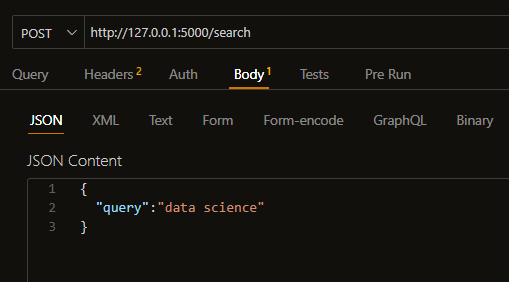